<a href="https://colab.research.google.com/github/xavieryn/MachineLearningProjects/blob/main/EmotionClassification(PyTorch%26CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# RESETING WORKSPACE (I HAVE NO IDEA HOW/WHEN JUPYTER NOTEBOOK RESETS A SPACE)
# RUN THIS CODE WHEN YOU WANT TO COMPLETE RESET
import shutil
shutil.rmtree('EmotionClassification/TrainingData')
shutil.rmtree('EmotionClassification/TestingData')
shutil.rmtree('EmotionClassification/test')
shutil.rmtree('EmotionClassification/train')
os.remove('EmotionClassification/Training.csv')
os.remove('EmotionClassification/Testing.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'EmotionClassification/Training.csv'

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

{}

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import os
import torchvision
import torchvision.transforms as transforms
import shutil

In [ ]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0
 87% 57.0M/65.2M [00:01<00:00, 39.4MB/s]
100% 65.2M/65.2M [00:01<00:00, 38.8MB/s]



**Opens the files in the Emotion Classification Folder**



In [ ]:
! unzip emotion-detection-fer.zip -d EmotionClassification

Streaming output truncated to the last 5000 lines.
  inflating: EmotionClassification/train/sad/im37.png  
  inflating: EmotionClassification/train/sad/im370.png  
  inflating: EmotionClassification/train/sad/im3700.png  
  inflating: EmotionClassification/train/sad/im3701.png  
  inflating: EmotionClassification/train/sad/im3702.png  
  inflating: EmotionClassification/train/sad/im3703.png  
  inflating: EmotionClassification/train/sad/im3704.png  
  inflating: EmotionClassification/train/sad/im3705.png  
  inflating: EmotionClassification/train/sad/im3706.png  
  inflating: EmotionClassification/train/sad/im3707.png  
  inflating: EmotionClassification/train/sad/im3708.png  
  inflating: EmotionClassification/train/sad/im3709.png  
  inflating: EmotionClassification/train/sad/im371.png  
  inflating: EmotionClassification/train/sad/im3710.png  
  inflating: EmotionClassification/train/sad/im3711.png  
  inflating: EmotionClassification/train/sad/im3712.png  
  inflating: EmotionClass

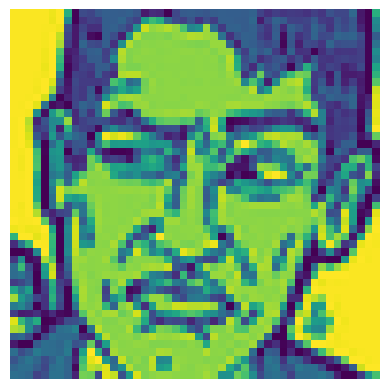

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Trying to learn how to display images lol

img = mpimg.imread('EmotionClassification/test/angry/im0.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
img[15][15] # Grabbing pixels of the image

0.31764707

Thoughts while implementing this small project



*   Need to go through all the images and "flatten" them (make a new folder and create a big array for each img basically)

*   Each folder says what the output should be, so that means I need to link that to the training input somehow.





**REDOING A LOT OF THINGS BECAUSE THIS IS PYTORCH**

I need to create my own custom "dataset", so that it can be put into the dataloader. This is unfortunately different than Keras, so I need to rewrite code.

First, I need to make a csv that loads all the images and its target. There will be n (number of examples) rows and 2 columns (file name and target).

I also need to get rid of the folders that say the emotion and combine them into one big dataset, so that Pytorch can easily grab it.

In [ ]:
# Directory
directoryTraining = "TrainingData"

# Parent Directory path
parent_dir = "EmotionClassification/"

path = os.path.join(parent_dir, directoryTraining)
os.mkdir(path)

directoryTest = "TestingData"

path = os.path.join(parent_dir,directoryTest)
os.mkdir(path)

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset
import imageio as io

class emotionDataset(Dataset):

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Arguments:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.landmarks_frame.iloc[index, 0])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.landmarks_frame.iloc[index,1 ]))

        if self.transform:
          image = self.transform(image)

          return(image, y_label)

In [ ]:
import csv

# append all data together and shuffle it
emotionDirectory = 'EmotionClassification/train'
emotionDict = {'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprised': 6}

with open('EmotionClassification/Training.csv', 'a') as f:
    writer = csv.writer(f)

    #writer.writerow(trainingDataPyTorch)

    for foldername in os.listdir(emotionDirectory):
      folder = os.path.join(emotionDirectory, foldername)
      if os.path.isdir(folder):

        for filename in os.listdir(emotionDirectory+'/'+foldername+'/'):

          dataFile = os.path.join(emotionDirectory+'/'+foldername+'/', filename)
          # checking if it is a file
          if os.path.isfile(dataFile):

            # dictionary emotion, anger = 0, disgusted = 1, fearful = 2, etc
            # put that into the append method, so that I can remember which is which

            writer.writerow([filename, emotionDict[foldername]] )
        # append all of the data together

In [ ]:
# GROUP ALL THE FILES TOGETHER INSTEAD OF DIFFERENT FOLDERS FOR EACH EMOTION
emotionDirectory = 'EmotionClassification/train'

for foldername in os.listdir(emotionDirectory):
      folder = os.path.join(emotionDirectory, foldername)
      if os.path.isdir(folder):

        for filename in os.listdir(emotionDirectory+'/'+foldername+'/'):

          dataFile = os.path.join(emotionDirectory+'/'+foldername+'/', filename)
          # checking if it is a file
          if os.path.isfile(dataFile):
            shutil.move(f"EmotionClassification/train/{foldername}/{filename}", f"EmotionClassification/TrainingData/{filename}")
        # append all of the data together

In [ ]:
train_dataset= emotionDataset(csv_file='/content/EmotionClassification/Training.csv',
                                    root_dir='/content/EmotionClassification/TrainingData', transform=transforms.ToTensor())

For organizing **testing** data

In [ ]:
# append all data together and shuffle it
emotionDirectory = 'EmotionClassification/test'
emotionDict = {'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprised': 6}
with open('EmotionClassification/Testing.csv', 'a') as f:
    writer = csv.writer(f)

    for foldername in os.listdir(emotionDirectory):
      folder = os.path.join(emotionDirectory, foldername)
      if os.path.isdir(folder):
        #print(foldername)
        #data = ArrayReshaper(emotionDirectory+'/'+foldername+'/', foldername)


        for filename in os.listdir(emotionDirectory+'/'+foldername+'/'):

          dataFile = os.path.join(emotionDirectory+'/'+foldername+'/', filename)
          # checking if it is a file
          if os.path.isfile(dataFile):

            # dictionary emotion, anger = 0, disgusted = 1, fearful = 2, etc
            # put that into the append method, so that I can remember which is which
            writer.writerow([filename, emotionDict[foldername]])


        # append all of the data together

In [ ]:
# GROUP ALL THE FILES TOGETHER INSTEAD OF DIFFERENT FOLDERS FOR EACH EMOTION
emotionDirectory = 'EmotionClassification/test'

for foldername in os.listdir(emotionDirectory):
      folder = os.path.join(emotionDirectory, foldername)
      if os.path.isdir(folder):

        for filename in os.listdir(emotionDirectory+'/'+foldername+'/'):

          dataFile = os.path.join(emotionDirectory+'/'+foldername+'/', filename)
          # checking if it is a file
          if os.path.isfile(dataFile):
            shutil.move(f"EmotionClassification/test/{foldername}/{filename}", f"EmotionClassification/TestingData/{filename}")


In [ ]:
test_dataset = emotionDataset(csv_file='EmotionClassification/Testing.csv',
                                    root_dir='EmotionClassification/TestingData', transform=transforms.ToTensor())

In [ ]:
batch_size = 64

#create data loaders (grabbing a smaller section of the data)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
print(train_loader)
print(test_loader)

In [ ]:
# CODE IS BROKEN HERE AHHHHHHHHHHHH
# CHECK TESTINGDATA AND TRAININGDATA
# I DID NOT CHECK ENOUGH HOW IT LOOKS LIKE AND EVERYTHING AND I DON"T EVEN KNOW
# IF IT CAN ACCESS THE FILE

for X in test_loader:
    print(f"Shape of X [N, C, H, W]: {X}")
    break

Shape of X [N, C, H, W]: [tensor([[[[1.0000, 1.0000, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.7647, 0.6235, 0.5255,  ..., 1.0000, 1.0000, 1.0000],
          [0.6196, 0.5529, 0.5608,  ..., 0.9922, 1.0000, 1.0000],
          [0.5176, 0.5490, 0.5569,  ..., 0.9961, 1.0000, 1.0000]]],


        [[[0.8431, 0.8549, 0.8510,  ..., 0.7804, 0.8196, 0.8392],
          [0.8353, 0.8392, 0.8471,  ..., 0.7569, 0.7843, 0.8275],
          [0.8353, 0.8353, 0.8431,  ..., 0.8039, 0.8353, 0.8510],
          ...,
          [0.0706, 0.0588, 0.0588,  ..., 0.0706, 0.0745, 0.0549],
          [0.0549, 0.0549, 0.0549,  ..., 0.0706, 0.0706, 0.0627],
          [0.0471, 0.0471, 0.0471,  ..., 0.0667, 0.0706, 0.0706]]],


        [[[0.0157, 0.0157, 0.0157,  ..., 0.0196, 0.0235, 0.0275],
          [0.0196, 0.0196, 0.0157,  ..., 0.0196, 0.0235, 0.0235],
          [0

<ipython-input-7-1c2260b76681>:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = io.imread(img_path)


In [ ]:
len(test_dataset)

7177

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

print(f"using {device} device")

using cuda device


<ipython-input-7-1c2260b76681>:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = io.imread(img_path)


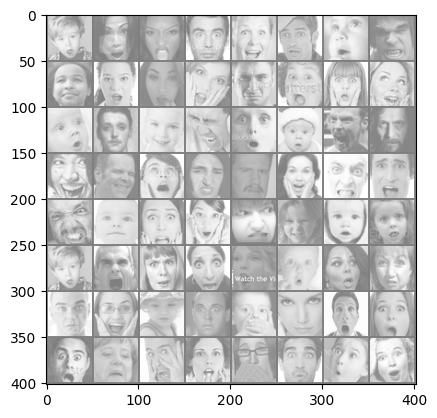

angry angry sad   surprised angry happy fearful sad   surprised fearful neutral sad   fearful surprised angry fearful fearful sad   happy neutral fearful sad   happy neutral happy happy surprised surprised happy angry happy happy happy happy happy sad   disgusted happy angry neutral happy angry neutral angry angry neutral sad   angry fearful sad   fearful fearful fearful happy sad   happy surprised happy angry happy happy fearful neutral angry
torch.Size([64, 1, 48, 48])
torch.Size([64, 6, 44, 44])
torch.Size([64, 6, 22, 22])
torch.Size([64, 16, 18, 18])
torch.Size([64, 16, 9, 9])
torch.Size([64, 1296])


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

classes = ('angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised')


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
print(images.shape)

conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size=5)
conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size=5)

x = conv1(images)
print(x.shape)
pool = nn.MaxPool2d(2, 2)
x = pool(x)
print(x.shape)
x = conv2(x)
print(x.shape)
x = pool(x)
print(x.shape)
x = torch.flatten(x, 1)
print(x.shape)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# THIS IS CURRENTLY MEANT FOR A 3 CHANNEL NET, but I am gray scale, so I
# need to switch it back to one channel

#https://www.youtube.com/watch?v=pDdP0TFzsoQ
# AT TIME 13:30, the guy shows how to calculate what the convolution should be in the end
# so it can do matrix multiplication on the fully connected layer

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size=5)
        #self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 9 * 9, 10000)
        self.fc2 = nn.Linear(10000, 800)

        self.fc3 = nn.Linear(800, 7)

    def forward(self, x):
        # THIS IS WHERE EVERYTHING ACTUALLY GETS CALLED :D
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to(device)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1e-3)

In [ ]:
 def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  net.train()

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    # Compute prediction error
    pred = model(X)
    loss = loss_fn(pred, y)

    # Back prop
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
      loss, current = loss.item(), (batch + 1) * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [ ]:
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)

  net.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1)== y ).type(torch.float).sum().item()
      #print(pred.argmax(1))
      #print(y)

    test_loss /= num_batches # 64
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
  num_batches = len(train_loader)
  num_batches

449

In [ ]:
epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, net, loss_fn, optimizer)
    test(test_loader, net, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.855984 [   64/28708]


<ipython-input-7-1c2260b76681>:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = io.imread(img_path)


loss: 1.809043 [ 6464/28708]
loss: 1.895572 [12864/28708]
loss: 1.830301 [19264/28708]
loss: 1.858171 [25664/28708]
Test Error: 
 Accuracy: 24.7%, Avg loss: 1.821453 

Epoch 2
-------------------------------
loss: 1.798369 [   64/28708]
loss: 1.802242 [ 6464/28708]
loss: 1.954685 [12864/28708]
loss: 1.825690 [19264/28708]
loss: 1.752873 [25664/28708]
Test Error: 
 Accuracy: 24.7%, Avg loss: 1.818006 

Epoch 3
-------------------------------
loss: 1.755849 [   64/28708]
loss: 1.855796 [ 6464/28708]
loss: 1.860221 [12864/28708]
loss: 1.795138 [19264/28708]
loss: 1.796180 [25664/28708]
Test Error: 
 Accuracy: 24.7%, Avg loss: 1.816360 

Epoch 4
-------------------------------
loss: 1.743119 [   64/28708]
loss: 1.757561 [ 6464/28708]
loss: 1.836963 [12864/28708]
loss: 1.813179 [19264/28708]
loss: 1.840775 [25664/28708]
Test Error: 
 Accuracy: 24.7%, Avg loss: 1.816534 

Epoch 5
-------------------------------
loss: 1.815596 [   64/28708]
loss: 1.796244 [ 6464/28708]
loss: 1.802085 [12864/2

Exception ignored in: <function PluginV3.__del__ at 0x7ea956cebbe0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/imageio/core/v3_plugin_api.py", line 370, in __del__
    self.close()
  File "/usr/local/lib/python3.10/dist-packages/imageio/plugins/pillow.py", line 126, in close
    self._image.close()
  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 585, in close
    if getattr(self, "_fp", False):
KeyboardInterrupt: 


loss: 1.797794 [ 6464/28708]
loss: 1.806175 [12864/28708]
loss: 1.809693 [19264/28708]
loss: 1.976734 [25664/28708]
Test Error: 
 Accuracy: 24.7%, Avg loss: 1.816629 

Epoch 7
-------------------------------
loss: 1.828523 [   64/28708]
loss: 1.832380 [ 6464/28708]
loss: 1.760366 [12864/28708]
loss: 1.834835 [19264/28708]
loss: 1.789856 [25664/28708]
Test Error: 
 Accuracy: 24.7%, Avg loss: 1.815869 

Epoch 8
-------------------------------
loss: 1.865035 [   64/28708]
loss: 1.883535 [ 6464/28708]
loss: 1.896926 [12864/28708]
loss: 1.835069 [19264/28708]
loss: 1.909065 [25664/28708]
Test Error: 
 Accuracy: 24.7%, Avg loss: 1.816687 

Epoch 9
-------------------------------
loss: 1.797526 [   64/28708]
loss: 1.781061 [ 6464/28708]
loss: 1.855674 [12864/28708]
loss: 1.874892 [19264/28708]
loss: 1.807033 [25664/28708]
Test Error: 
 Accuracy: 24.7%, Avg loss: 1.813862 

Epoch 10
-------------------------------
loss: 1.807089 [   64/28708]
loss: 1.799764 [ 6464/28708]
loss: 1.901545 [12864/

In [ ]:
# I NEED TO PLOT A GRAPH TO SEE HOW EVERYTHING IS CHANGING

Debugging this Mess:

*   Model is not overfitting because the training accuracy is only slightly better than the testing accuracy

*   Next step for tomorrow: LOOK AT THE DATA AND MAKE SURE THE IMAGE NUMBER MATCHES WITH THE EMOTION (JUST CHECKED AND I AM 90% sure that my data is correct and its getting organized the right way. The right files are grouped with the same number)
